In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb

!pip install xgboost --upgrade

     |████████████████████████████████| 157.5MB 73kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


각 모델별 전체적인 학습 파이프라인
1. 모델정의
2. 학습진행
3. 그리드서치를 통한 파라미터 최적화
4. Loss 및 예측값 plotting
5. 실제-예측값 plotting

# 1.데이터전처리

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/supervised/df2.csv")

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df

,RF,MB,PL,DP,KOSPI
0,7.100,0.9142,0.5741,1.7884,748.070007
1,7.000,1.7480,0.4764,0.6581,819.989990
2,7.170,1.2399,0.5681,2.5160,895.580017
3,7.300,0.8816,0.5663,0.8037,842.340027
4,7.090,1.6561,0.3745,0.4645,796.400024
...,...,...,...,...,...
222,1.360,1.7599,-0.0095,0.1371,2249.370117
223,1.373,-0.4196,0.6103,0.2877,2326.169922
224,1.500,2.6690,0.6635,1.2475,2327.889893
225,1.507,0.1126,-0.5556,0.8347,2267.149902


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) #데이터 스케일링

df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
df_scaled = df_scaled.loc[:,["RF","MB","DP","KOSPI"]] #학습에 사용할 데이터 정의

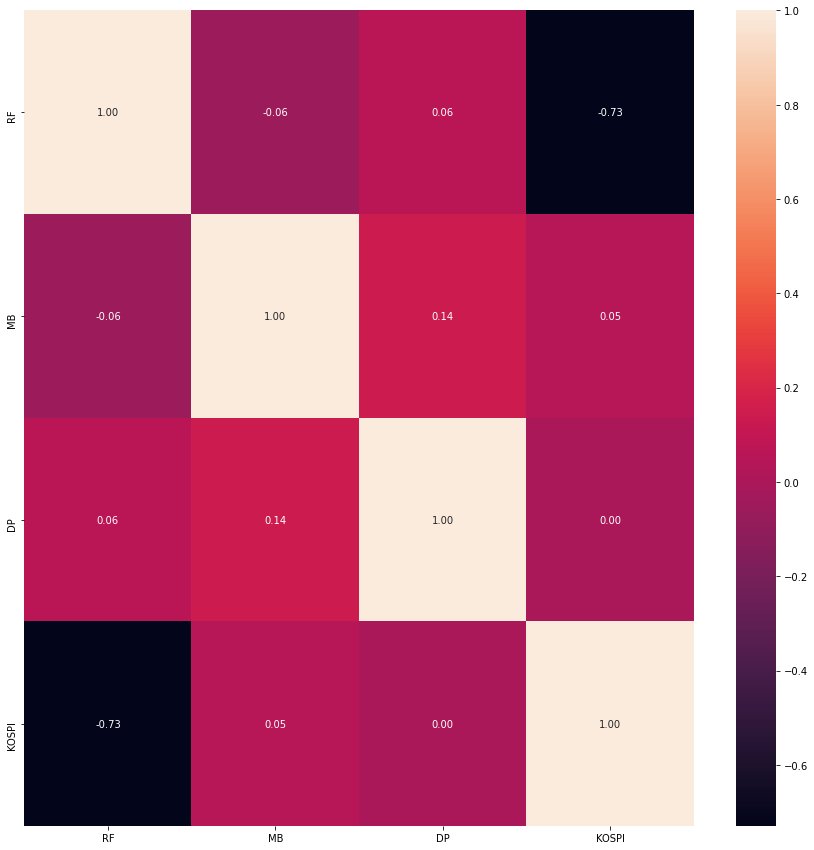

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_scaled.corr(),fmt=".2f",annot=True)

In [ ]:
X, y = df_scaled.iloc[:200,0:3],df_scaled.iloc[:200,3] #학습용 데이터
X_test, y_test = df_scaled.iloc[200:,0:3],df_scaled.iloc[200:,3] #테스트용 데이터

# 2.LGBM 학습

In [ ]:
params = {
    "learning_rate" :0.03,
    "objective" : "regression",
    "metric" : "mse",
    "max_depth" : 10,
    "num_boost_round" : 300
} #파라미터 정의

val_mse = []

cv = KFold(n_splits=10,shuffle=False) #교차검증 정의
iter = 0

for t,v in cv.split(X):

  X_train, X_val = X.iloc[t], X.iloc[v]
  y_train, y_val = y[t],y[v]

  trainset = lgb.Dataset(X_train,y_train) #학습용 데이터 정의
  valset = lgb.Dataset(X_val,y_val) #검증용 데이터 정의

  lgbm = lgb.train(params=params,train_set=trainset,valid_sets=valset,verbose_eval=3)

  val_mse.append(mean_squared_error(y_val,lgbm.predict(X_val))) #검증용 데이터에 대한 Loss 계산하여 val_mse 리스트에 저장
  

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[3]	valid_0's l2: 0.23806
[6]	valid_0's l2: 0.22766
[9]	valid_0's l2: 0.218525
[12]	valid_0's l2: 0.210413
[15]	valid_0's l2: 0.20364
[18]	valid_0's l2: 0.19825
[21]	valid_0's l2: 0.19312
[24]	valid_0's l2: 0.188673
[27]	valid_0's l2: 0.184873
[30]	valid_0's l2: 0.18092
[33]	valid_0's l2: 0.177711
[36]	valid_0's l2: 0.174715
[39]	valid_0's l2: 0.172322
[42]	valid_0's l2: 0.169553
[45]	valid_0's l2: 0.167979
[48]	valid_0's l2: 0.165863
[51]	valid_0's l2: 0.164564
[54]	valid_0's l2: 0.163543
[57]	valid_0's l2: 0.162664
[60]	valid_0's l2: 0.160802
[63]	valid_0's l2: 0.160167
[66]	valid_0's l2: 0.159073
[69]	valid_0's l2: 0.156999
[72]	valid_0's l2: 0.155145
[75]	valid_0's l2: 0.15362
[78]	valid_0's l2: 0.151718
[81]	valid_0's l2: 0.15031
[84]	valid_0's l2: 0.148945
[87]	valid_0's l2: 0.147833
[90]	valid_0's l2: 0.146706
[93]	valid_0's l2: 0.146059
[96]	valid_0's l2: 0.145045
[99]	valid_0's l2: 0.144458
[102]	valid_0's l2: 0.143999
[105]	valid_0's l2: 0.14295
[108]	valid_0's l2: 0.141875
[

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[159]	valid_0's l2: 0.125285
[162]	valid_0's l2: 0.125004
[165]	valid_0's l2: 0.124628
[168]	valid_0's l2: 0.124191
[171]	valid_0's l2: 0.123869
[174]	valid_0's l2: 0.123101
[177]	valid_0's l2: 0.123021
[180]	valid_0's l2: 0.122676
[183]	valid_0's l2: 0.122486
[186]	valid_0's l2: 0.122197
[189]	valid_0's l2: 0.122062
[192]	valid_0's l2: 0.122136
[195]	valid_0's l2: 0.122249
[198]	valid_0's l2: 0.121842
[201]	valid_0's l2: 0.121653
[204]	valid_0's l2: 0.121568
[207]	valid_0's l2: 0.121633
[210]	valid_0's l2: 0.121168
[213]	valid_0's l2: 0.120703
[216]	valid_0's l2: 0.120606
[219]	valid_0's l2: 0.120593
[222]	valid_0's l2: 0.12045
[225]	valid_0's l2: 0.120397
[228]	valid_0's l2: 0.119964
[231]	valid_0's l2: 0.119615
[234]	valid_0's l2: 0.119506
[237]	valid_0's l2: 0.11939
[240]	valid_0's l2: 0.119014
[243]	valid_0's l2: 0.119408
[246]	valid_0's l2: 0.119116
[249]	valid_0's l2: 0.118649
[252]	valid_0's l2: 0.118764
[255]	valid_0's l2: 0.118543
[258]	valid_0's l2: 0.118004
[261]	valid_0's 

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[105]	valid_0's l2: 0.0152597
[108]	valid_0's l2: 0.0152637
[111]	valid_0's l2: 0.0153346
[114]	valid_0's l2: 0.015674
[117]	valid_0's l2: 0.0159066
[120]	valid_0's l2: 0.0160244
[123]	valid_0's l2: 0.0162058
[126]	valid_0's l2: 0.0161633
[129]	valid_0's l2: 0.016349
[132]	valid_0's l2: 0.0164603
[135]	valid_0's l2: 0.016605
[138]	valid_0's l2: 0.016743
[141]	valid_0's l2: 0.0170994
[144]	valid_0's l2: 0.017326
[147]	valid_0's l2: 0.0174054
[150]	valid_0's l2: 0.0175393
[153]	valid_0's l2: 0.0177291
[156]	valid_0's l2: 0.017875
[159]	valid_0's l2: 0.0181889
[162]	valid_0's l2: 0.0182902
[165]	valid_0's l2: 0.018513
[168]	valid_0's l2: 0.0187261
[171]	valid_0's l2: 0.0189455
[174]	valid_0's l2: 0.0191626
[177]	valid_0's l2: 0.019265
[180]	valid_0's l2: 0.0192984
[183]	valid_0's l2: 0.0194547
[186]	valid_0's l2: 0.0195098
[189]	valid_0's l2: 0.0195736
[192]	valid_0's l2: 0.0195104
[195]	valid_0's l2: 0.0196143
[198]	valid_0's l2: 0.0196294
[201]	valid_0's l2: 0.0195082
[204]	valid_0's l2

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[3]	valid_0's l2: 0.0141866
[6]	valid_0's l2: 0.0178423
[9]	valid_0's l2: 0.0219564
[12]	valid_0's l2: 0.0263606
[15]	valid_0's l2: 0.0310878
[18]	valid_0's l2: 0.035457
[21]	valid_0's l2: 0.0401364
[24]	valid_0's l2: 0.0447654
[27]	valid_0's l2: 0.0492987
[30]	valid_0's l2: 0.0540654
[33]	valid_0's l2: 0.0586595
[36]	valid_0's l2: 0.0623722
[39]	valid_0's l2: 0.0656733
[42]	valid_0's l2: 0.0689503
[45]	valid_0's l2: 0.072036
[48]	valid_0's l2: 0.0757289
[51]	valid_0's l2: 0.0786706
[54]	valid_0's l2: 0.0810574
[57]	valid_0's l2: 0.0833823
[60]	valid_0's l2: 0.0855275
[63]	valid_0's l2: 0.0879399
[66]	valid_0's l2: 0.0899959
[69]	valid_0's l2: 0.0920342
[72]	valid_0's l2: 0.093976
[75]	valid_0's l2: 0.0956917
[78]	valid_0's l2: 0.0968223
[81]	valid_0's l2: 0.0984967
[84]	valid_0's l2: 0.100017
[87]	valid_0's l2: 0.101136
[90]	valid_0's l2: 0.10251
[93]	valid_0's l2: 0.104061
[96]	valid_0's l2: 0.105522
[99]	valid_0's l2: 0.105763
[102]	valid_0's l2: 0.10639
[105]	valid_0's l2: 0.106989

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[156]	valid_0's l2: 0.0168513
[159]	valid_0's l2: 0.0168513
[162]	valid_0's l2: 0.0171473
[165]	valid_0's l2: 0.0174491
[168]	valid_0's l2: 0.0174063
[171]	valid_0's l2: 0.0174239
[174]	valid_0's l2: 0.0174885
[177]	valid_0's l2: 0.0177456
[180]	valid_0's l2: 0.0179399
[183]	valid_0's l2: 0.0179942
[186]	valid_0's l2: 0.0179963
[189]	valid_0's l2: 0.0180058
[192]	valid_0's l2: 0.0179829
[195]	valid_0's l2: 0.0181751
[198]	valid_0's l2: 0.0181296
[201]	valid_0's l2: 0.0181991
[204]	valid_0's l2: 0.0183838
[207]	valid_0's l2: 0.0182991
[210]	valid_0's l2: 0.018346
[213]	valid_0's l2: 0.0184805
[216]	valid_0's l2: 0.0185318
[219]	valid_0's l2: 0.0186408
[222]	valid_0's l2: 0.0185991
[225]	valid_0's l2: 0.0185926
[228]	valid_0's l2: 0.0184326
[231]	valid_0's l2: 0.0184983
[234]	valid_0's l2: 0.0183356
[237]	valid_0's l2: 0.0185464
[240]	valid_0's l2: 0.0184202
[243]	valid_0's l2: 0.018413
[246]	valid_0's l2: 0.0184581
[249]	valid_0's l2: 0.0183642
[252]	valid_0's l2: 0.0183874
[255]	valid_

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[51]	valid_0's l2: 0.134944
[54]	valid_0's l2: 0.137168
[57]	valid_0's l2: 0.139684
[60]	valid_0's l2: 0.142533
[63]	valid_0's l2: 0.144114
[66]	valid_0's l2: 0.146036
[69]	valid_0's l2: 0.148289
[72]	valid_0's l2: 0.149812
[75]	valid_0's l2: 0.151211
[78]	valid_0's l2: 0.152574
[81]	valid_0's l2: 0.153715
[84]	valid_0's l2: 0.155253
[87]	valid_0's l2: 0.155864
[90]	valid_0's l2: 0.156031
[93]	valid_0's l2: 0.156416
[96]	valid_0's l2: 0.157299
[99]	valid_0's l2: 0.158003
[102]	valid_0's l2: 0.158381
[105]	valid_0's l2: 0.158869
[108]	valid_0's l2: 0.159634
[111]	valid_0's l2: 0.159931
[114]	valid_0's l2: 0.159891
[117]	valid_0's l2: 0.159898
[120]	valid_0's l2: 0.159626
[123]	valid_0's l2: 0.159689
[126]	valid_0's l2: 0.159872
[129]	valid_0's l2: 0.159879
[132]	valid_0's l2: 0.160538
[135]	valid_0's l2: 0.160594
[138]	valid_0's l2: 0.160867
[141]	valid_0's l2: 0.161242
[144]	valid_0's l2: 0.161117
[147]	valid_0's l2: 0.161696
[150]	valid_0's l2: 0.161673
[153]	valid_0's l2: 0.161849
[

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[159]	valid_0's l2: 0.00902999
[162]	valid_0's l2: 0.00901004
[165]	valid_0's l2: 0.00903401
[168]	valid_0's l2: 0.00915827
[171]	valid_0's l2: 0.00919885
[174]	valid_0's l2: 0.00925038
[177]	valid_0's l2: 0.00924376
[180]	valid_0's l2: 0.00931861
[183]	valid_0's l2: 0.00934365
[186]	valid_0's l2: 0.00934105
[189]	valid_0's l2: 0.00931296
[192]	valid_0's l2: 0.00941698
[195]	valid_0's l2: 0.00941784
[198]	valid_0's l2: 0.00948289
[201]	valid_0's l2: 0.00953252
[204]	valid_0's l2: 0.00957222
[207]	valid_0's l2: 0.00956954
[210]	valid_0's l2: 0.00967813
[213]	valid_0's l2: 0.00965652
[216]	valid_0's l2: 0.00965367
[219]	valid_0's l2: 0.00961244
[222]	valid_0's l2: 0.00963565
[225]	valid_0's l2: 0.0096203
[228]	valid_0's l2: 0.00959437
[231]	valid_0's l2: 0.00958355
[234]	valid_0's l2: 0.00950893
[237]	valid_0's l2: 0.0094472
[240]	valid_0's l2: 0.0095422
[243]	valid_0's l2: 0.0095011
[246]	valid_0's l2: 0.00942043
[249]	valid_0's l2: 0.00942031
[252]	valid_0's l2: 0.00935114
[255]	valid_

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[60]	valid_0's l2: 0.00425899
[63]	valid_0's l2: 0.00427607
[66]	valid_0's l2: 0.00425174
[69]	valid_0's l2: 0.00424215
[72]	valid_0's l2: 0.00426334
[75]	valid_0's l2: 0.00428558
[78]	valid_0's l2: 0.00427617
[81]	valid_0's l2: 0.00422706
[84]	valid_0's l2: 0.00421606
[87]	valid_0's l2: 0.0042366
[90]	valid_0's l2: 0.00425481
[93]	valid_0's l2: 0.00426213
[96]	valid_0's l2: 0.00430514
[99]	valid_0's l2: 0.00434618
[102]	valid_0's l2: 0.00448438
[105]	valid_0's l2: 0.00465929
[108]	valid_0's l2: 0.00489558
[111]	valid_0's l2: 0.00498525
[114]	valid_0's l2: 0.00510468
[117]	valid_0's l2: 0.00534259
[120]	valid_0's l2: 0.00554276
[123]	valid_0's l2: 0.00581607
[126]	valid_0's l2: 0.0059998
[129]	valid_0's l2: 0.00623899
[132]	valid_0's l2: 0.00644383
[135]	valid_0's l2: 0.00658933
[138]	valid_0's l2: 0.00670963
[141]	valid_0's l2: 0.00688222
[144]	valid_0's l2: 0.00696111
[147]	valid_0's l2: 0.0072026
[150]	valid_0's l2: 0.0072412
[153]	valid_0's l2: 0.00730107
[156]	valid_0's l2: 0.0074

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[267]	valid_0's l2: 0.0148253
[270]	valid_0's l2: 0.0147985
[273]	valid_0's l2: 0.0148367
[276]	valid_0's l2: 0.0149531
[279]	valid_0's l2: 0.0148071
[282]	valid_0's l2: 0.0149403
[285]	valid_0's l2: 0.0147579
[288]	valid_0's l2: 0.0148252
[291]	valid_0's l2: 0.0148015
[294]	valid_0's l2: 0.0149356
[297]	valid_0's l2: 0.014987
[300]	valid_0's l2: 0.0150936
[3]	valid_0's l2: 0.148914
[6]	valid_0's l2: 0.135774
[9]	valid_0's l2: 0.124328
[12]	valid_0's l2: 0.114324
[15]	valid_0's l2: 0.105614
[18]	valid_0's l2: 0.0979709
[21]	valid_0's l2: 0.0912822
[24]	valid_0's l2: 0.0853877
[27]	valid_0's l2: 0.0801752
[30]	valid_0's l2: 0.0755058
[33]	valid_0's l2: 0.0713351
[36]	valid_0's l2: 0.0678024
[39]	valid_0's l2: 0.0646644
[42]	valid_0's l2: 0.0620155
[45]	valid_0's l2: 0.0593761
[48]	valid_0's l2: 0.0572481
[51]	valid_0's l2: 0.0552738
[54]	valid_0's l2: 0.0534022
[57]	valid_0's l2: 0.0516694
[60]	valid_0's l2: 0.0502418
[63]	valid_0's l2: 0.0490044
[66]	valid_0's l2: 0.0477317
[69]	valid_

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[174]	valid_0's l2: 0.0352404
[177]	valid_0's l2: 0.035116
[180]	valid_0's l2: 0.0351737
[183]	valid_0's l2: 0.0352631
[186]	valid_0's l2: 0.0353138
[189]	valid_0's l2: 0.0351807
[192]	valid_0's l2: 0.0351841
[195]	valid_0's l2: 0.0351581
[198]	valid_0's l2: 0.0352142
[201]	valid_0's l2: 0.0351491
[204]	valid_0's l2: 0.0353189
[207]	valid_0's l2: 0.0352776
[210]	valid_0's l2: 0.0351713
[213]	valid_0's l2: 0.0352191
[216]	valid_0's l2: 0.0351914
[219]	valid_0's l2: 0.0352649
[222]	valid_0's l2: 0.0352546
[225]	valid_0's l2: 0.0351969
[228]	valid_0's l2: 0.0352203
[231]	valid_0's l2: 0.0351438
[234]	valid_0's l2: 0.0349885
[237]	valid_0's l2: 0.0348502
[240]	valid_0's l2: 0.0346764
[243]	valid_0's l2: 0.0347136
[246]	valid_0's l2: 0.0346001
[249]	valid_0's l2: 0.0345695
[252]	valid_0's l2: 0.034447
[255]	valid_0's l2: 0.0344344
[258]	valid_0's l2: 0.0344474
[261]	valid_0's l2: 0.0341791
[264]	valid_0's l2: 0.0343817
[267]	valid_0's l2: 0.0343337
[270]	valid_0's l2: 0.0344383
[273]	valid_

Text(0.5, 1.0, 'MSE of Validation')

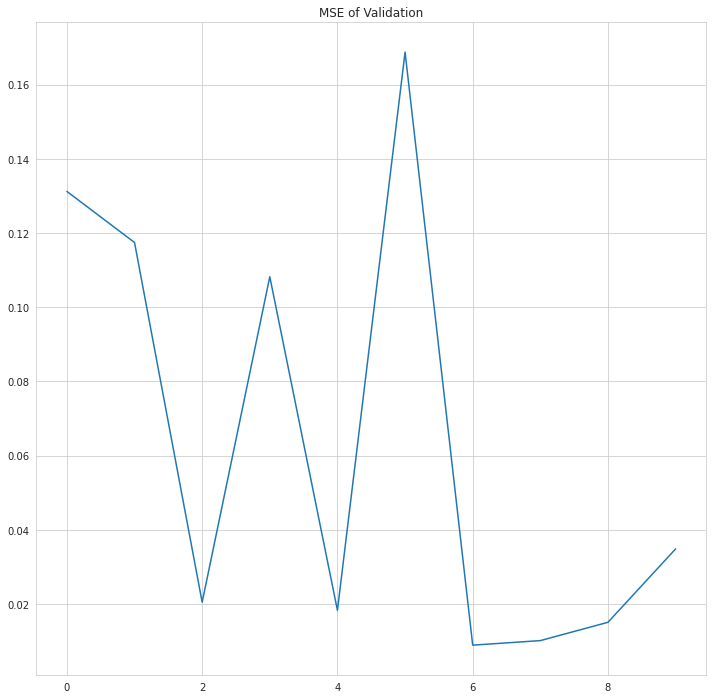

In [ ]:
#검증 LOSS 

sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
plt.plot(val_mse)
plt.title("MSE of Validation")

In [ ]:
lgbm_pred = lgbm.predict(X_test)

In [ ]:
lgbm_pred_df = pd.DataFrame(lgbm_pred,columns=["Pred"])
lgbm_pred_df.to_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/pred_dp.csv",index=False) # LGBM 예측값 저장

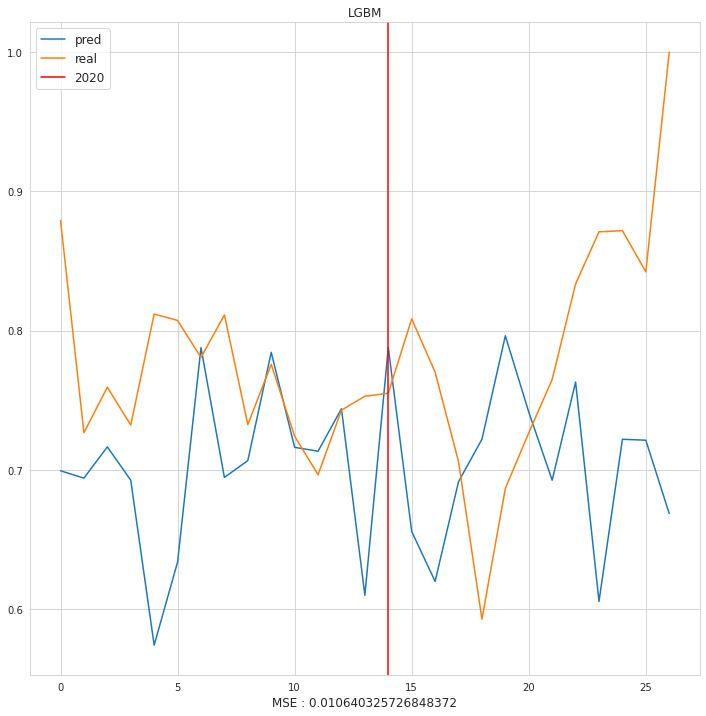

In [ ]:
#LGBM 결과값

sns.set_style("whitegrid")
lgbm_error = mean_squared_error(y_test.tolist()[:-12],lgbm_pred[:-12]) #2020년 데이터에 대한 Loss

fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(lgbm_pred,label="pred")
ax.plot(y_test.tolist(),label="real")
ax.set_title("LGBM",fontsize=12)
ax.set_xlabel("MSE : {}".format(lgbm_error),fontsize=12)

plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")

plt.legend(fontsize=12)

Text(0.5, 1.0, 'Quantitative Bubble')

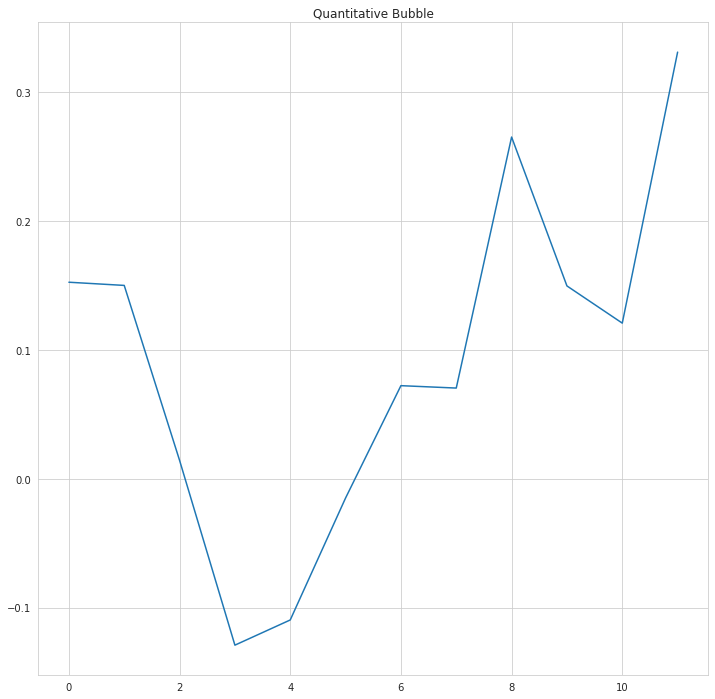

In [ ]:
lgbm_alpha = y_test.tolist()[-12:]-lgbm_pred[-12:] #2020년 이후 실제값-예측값

plt.figure(figsize=(12,12))
plt.plot(lgbm_alpha)
plt.title("Quantitative Bubble")

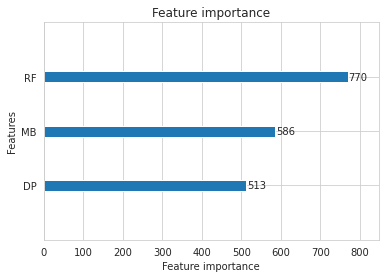

In [ ]:
lgb.plot_importance(lgbm) #Feature importance 

In [ ]:
lgbm_gs = lgb.LGBMRegressor()

In [ ]:
params2 = {
    "max_depth" : [10,20,30,40],
    "learning_rate" : [0.03,0.05],
    "n_estimators" : [100,200,300,400],
    "num_leaves" : [10,20,30,40],
    "reg_alpha" : [0.05]
} #그리드 서치 파라미터 정의

In [ ]:
scorer = make_scorer(mean_squared_error) #그리드 서치 점수 기준 정의
gs = GridSearchCV(lgbm_gs,param_grid=params2,scoring=scorer,n_jobs=-1,cv=20,verbose=2) #그리드 서치 정의

In [ ]:
gs.fit(X,y)

Fitting 20 folds for each of 128 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  1.2min finished


GridSearchCV(cv=20, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.05],
                         'max_depth': [10, 20, 30, 40],
                         'n_estimators': [100, 200, 300, 400],
      

In [ ]:
lgbm_gs_best = gs.best_estimator_

In [ ]:
gs.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
              random_state=None, reg_alpha=0.05, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
gs.best_score_ #가장 성능 좋은 모델에 대한 Loss 출력

0.0461040977956023

In [ ]:
lgbm_gs_pred = lgbm_gs_best.predict(X_test) #그리드서치 후 가장 성능 좋은 모델을 통해 결과값 도출

In [ ]:
lgbm_gs_pred_df = pd.DataFrame(lgbm_gs_pred,columns=["Pred"])
lgbm_gs_pred_df.to_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/lgbm_dp_gs.csv",index=False) #그리드서치 예측값 저장

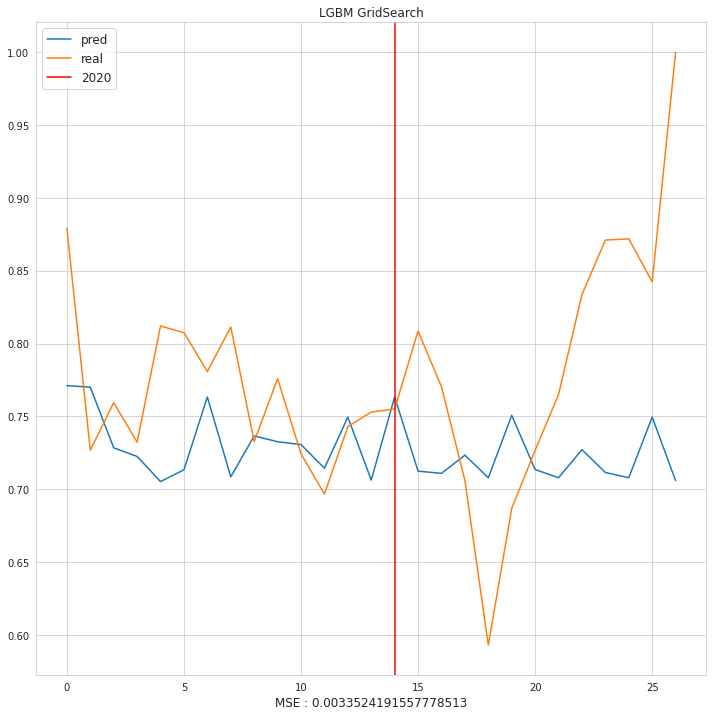

In [ ]:
# 예측값 plotting

lgbm_gs_error = mean_squared_error(y_test.tolist()[:-12],lgbm_gs_pred[:-12]) #2020년 데이터 실제값-예측값

fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(lgbm_gs_pred,label="pred")
ax.plot(y_test.tolist(),label="real")
ax.set_title("LGBM GridSearch",fontsize=12)
ax.set_xlabel("MSE : {}".format(lgbm_gs_error),fontsize=12)

plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")

plt.legend(fontsize=12)

Text(0.5, 1.0, 'Quantitative Bubble')

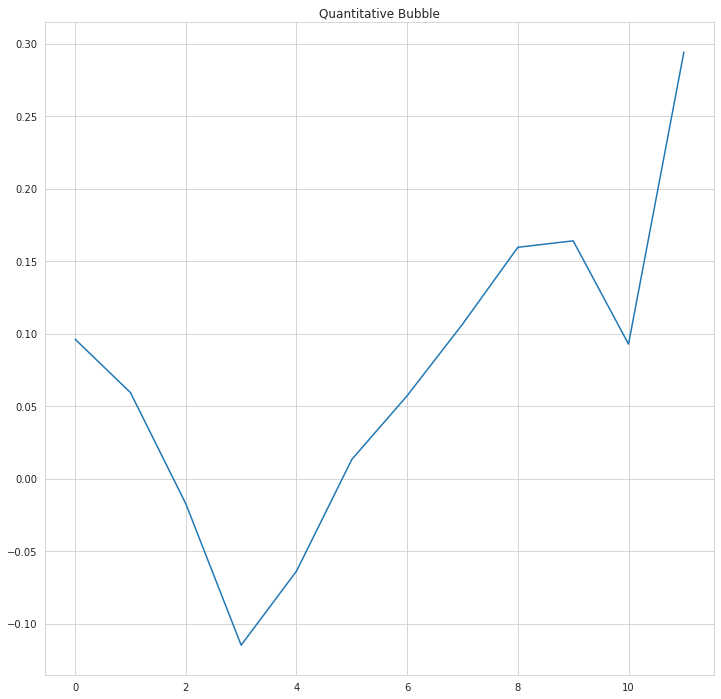

In [ ]:
# 실제-예측 plotting

lgbm_gs_alpha = y_test.tolist()[-12:]-lgbm_gs_pred[-12:]

plt.figure(figsize=(12,12))
plt.plot(lgbm_gs_alpha)
plt.title("Quantitative Bubble")

# 3.XGBOOST 학습

In [ ]:
# LGBM 모델학습 파이프라인과 동일

import xgboost

In [ ]:
xgboost = xgboost.XGBRegressor(objective="reg:squarederror",eta=0.03) #모델 정의

In [ ]:
for t,v in cv.split(X):

  X_train, X_val = X.iloc[t], X.iloc[v] #교차검증용 학습,검증용 데이터 분리
  y_train, y_val = y[t],y[v]

  xgboost.fit(X_train.values,y_train.values,eval_set=[(X_val.values,y_val.values)])

[0]	validation_0-rmse:0.42178
[1]	validation_0-rmse:0.42198
[2]	validation_0-rmse:0.42229
[3]	validation_0-rmse:0.42101
[4]	validation_0-rmse:0.42155
[5]	validation_0-rmse:0.42059
[6]	validation_0-rmse:0.42102
[7]	validation_0-rmse:0.42012
[8]	validation_0-rmse:0.42058
[9]	validation_0-rmse:0.42119
[10]	validation_0-rmse:0.42041
[11]	validation_0-rmse:0.41947
[12]	validation_0-rmse:0.41998
[13]	validation_0-rmse:0.42052
[14]	validation_0-rmse:0.41965
[15]	validation_0-rmse:0.41994
[16]	validation_0-rmse:0.41930
[17]	validation_0-rmse:0.41946
[18]	validation_0-rmse:0.41887
[19]	validation_0-rmse:0.41945
[20]	validation_0-rmse:0.41851
[21]	validation_0-rmse:0.41872
[22]	validation_0-rmse:0.41825
[23]	validation_0-rmse:0.41853
[24]	validation_0-rmse:0.41847
[25]	validation_0-rmse:0.41877
[26]	validation_0-rmse:0.41822
[27]	validation_0-rmse:0.41822
[28]	validation_0-rmse:0.41813
[29]	validation_0-rmse:0.41730
[30]	validation_0-rmse:0.41675
[31]	validation_0-rmse:0.41637
[32]	validation_0-

In [ ]:
xgboost_pred = xgboost.predict(X_test.values)

In [ ]:
eval_result = xgboost.evals_result() #학습중 발생한 Loss 데이터 저장

0.25662086


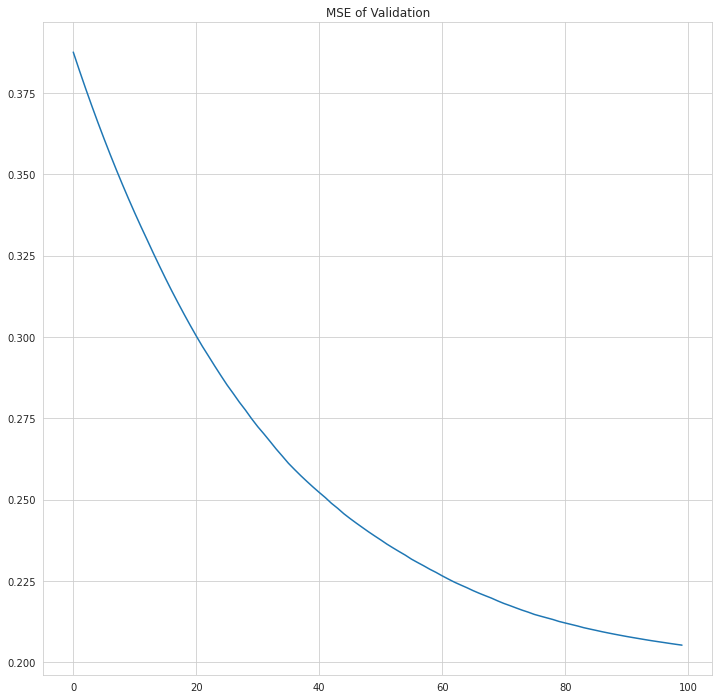

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(eval_result["validation_0"]["rmse"])
plt.title("MSE of Validation",fontsize=12)
print(np.average(eval_result["validation_0"]["rmse"]))

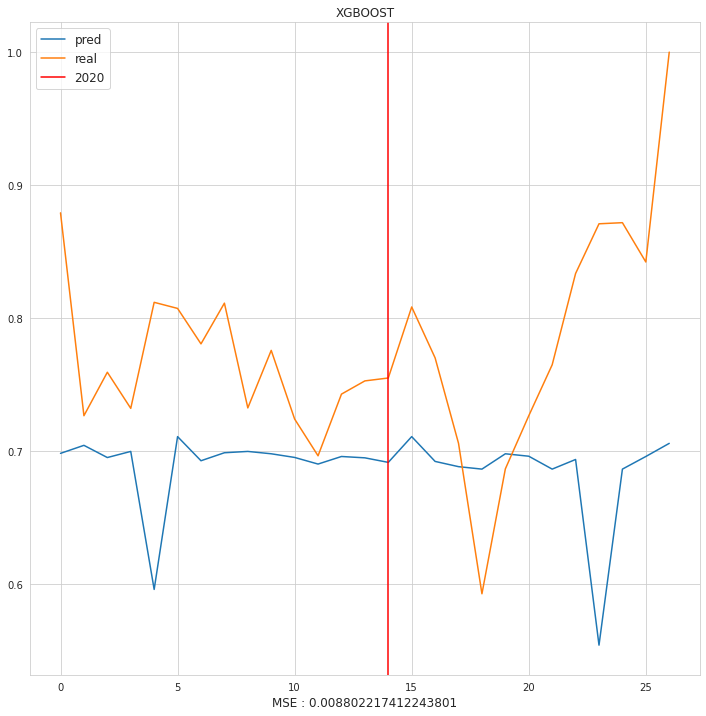

In [ ]:
xgboost_error = mean_squared_error(y_test.tolist()[:-12],xgboost_pred[:-12]) #2020년 데이터에 대한 Loss 도출

fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(xgboost_pred,label="pred")
ax.plot(y_test.tolist(),label="real")
ax.set_title("XGBOOST",fontsize=12)
ax.set_xlabel("MSE : {}".format(xgboost_error),fontsize=12)

plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")

plt.legend(fontsize=12)

Text(0.5, 1.0, 'Quantitative Bubble')

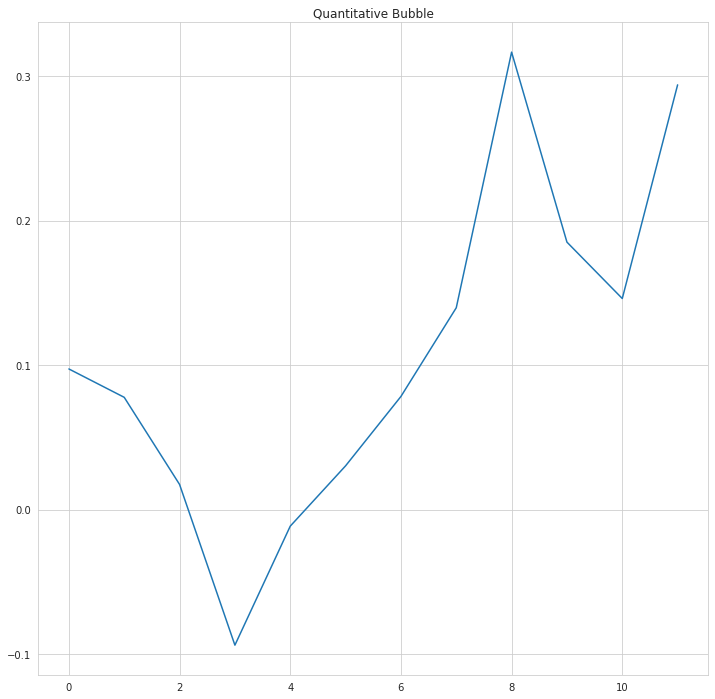

In [ ]:
xgboost_alpha = y_test.tolist()[-12:]-xgboost_pred[-12:]

plt.figure(figsize=(12,12))
plt.plot(xgboost_alpha)
plt.title("Quantitative Bubble")

In [ ]:
params = {"eta" : [0.01,0.03,0.05],
          "max_depth" : [3,6,9,12],
          } #파라미터 정의



gs = GridSearchCV(xgboost,param_grid=params,scoring=scorer,verbose=1,cv=20)
gs.fit(X,y)

Fitting 20 folds for each of 12 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   21.3s finished


GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, eta=0.03, gamma=0,
                                    gpu_id=-1, importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.0299999993,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators...
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                 

In [ ]:
gs.best_params_

{'eta': 0.01, 'max_depth': 12}

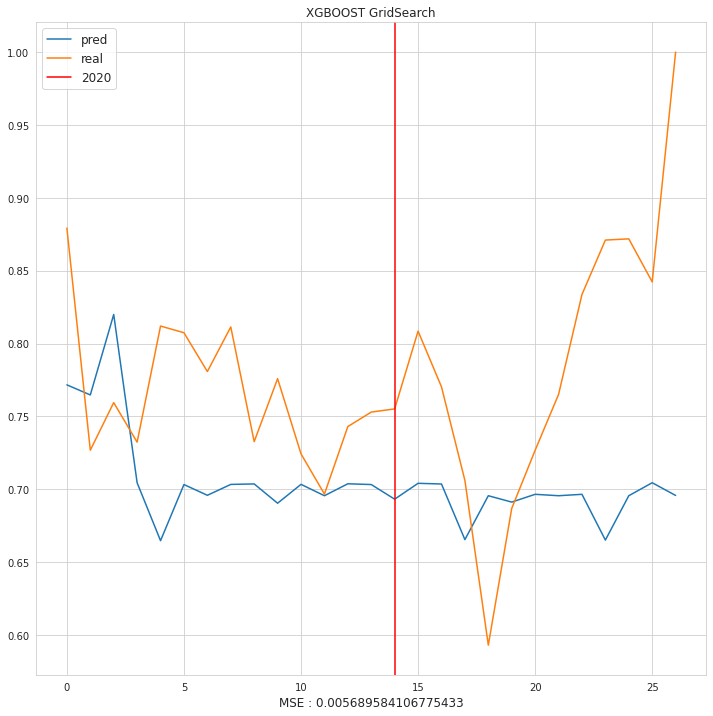

In [ ]:
xgboost_gs_best = gs.best_estimator_

xgboost_gs_pred = xgboost_gs_best.predict(X_test) #그리드서치 최적 파라미터를 통한 예측값 도출

xgboost_gs_error = mean_squared_error(y_test.tolist()[:-12],xgboost_gs_pred[:-12]) #2020년 예측값렝 대한 Loss 도출

fig = plt.figure(figsize=(12,12))

ax = fig.subplots(1,1)
ax.plot(xgboost_gs_pred,label="pred")
ax.plot(y_test.tolist(),label="real")
ax.set_title("XGBOOST GridSearch",fontsize=12)
ax.set_xlabel("MSE : {}".format(xgboost_gs_error),fontsize=12)

plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")

plt.legend(fontsize=12)

Text(0.5, 1.0, 'Quantitative Bubble')

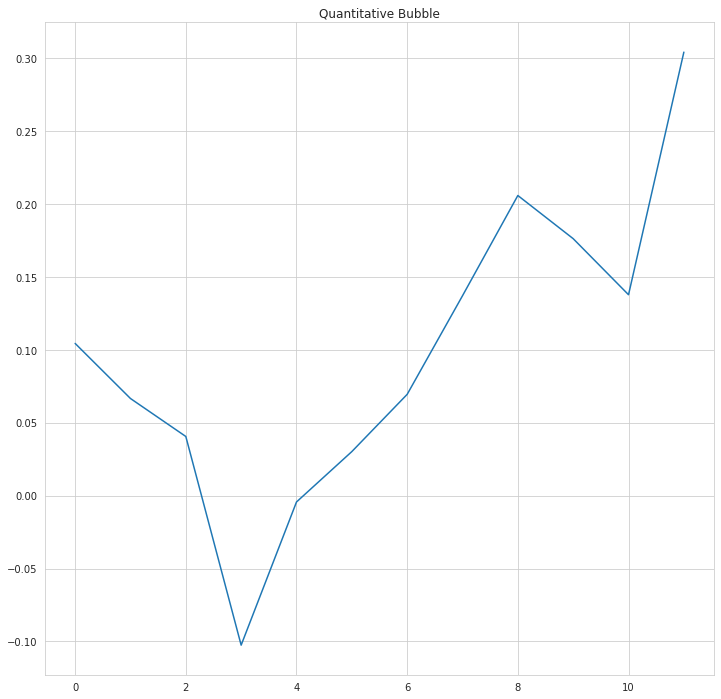

In [ ]:
xgboost_gs_alpha = y_test.tolist()[-12:]-xgboost_gs_pred[-12:]

plt.figure(figsize=(12,12))
plt.plot(xgboost_gs_alpha)
plt.title("Quantitative Bubble")

# 4.Linear Regression 학습

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

epoch = 0
error = []

for t,v in cv.split(X):

  X_train, X_val = X.iloc[t],X.iloc[v] #교차검증 학습용, 검증용 데이터 분리
  y_train, y_val = y[t],y[v] 

  LR.fit(X_train,y_train)

  LR_pred = LR.predict(X_val) #모델을 통한 예측값 도출

  mse = mean_squared_error(y_val,LR_pred) #예측값에 대한 Loss 도출

  error.append(mse) #mse 리스트에 Loss 저장

  print("CV {} MSE : {}".format(epoch,mse))

  epoch += 1

CV 0 MSE : 0.09905023219211463
CV 1 MSE : 0.12265371007095463
CV 2 MSE : 0.012638906473058719
CV 3 MSE : 0.09154273775724989
CV 4 MSE : 0.018617028249094347
CV 5 MSE : 0.04274173417764221
CV 6 MSE : 0.00682559665756097
CV 7 MSE : 0.006797745572445486
CV 8 MSE : 0.03617563873432551
CV 9 MSE : 0.037077184255818484


Text(0.5, 1.0, 'MSE of Validation')

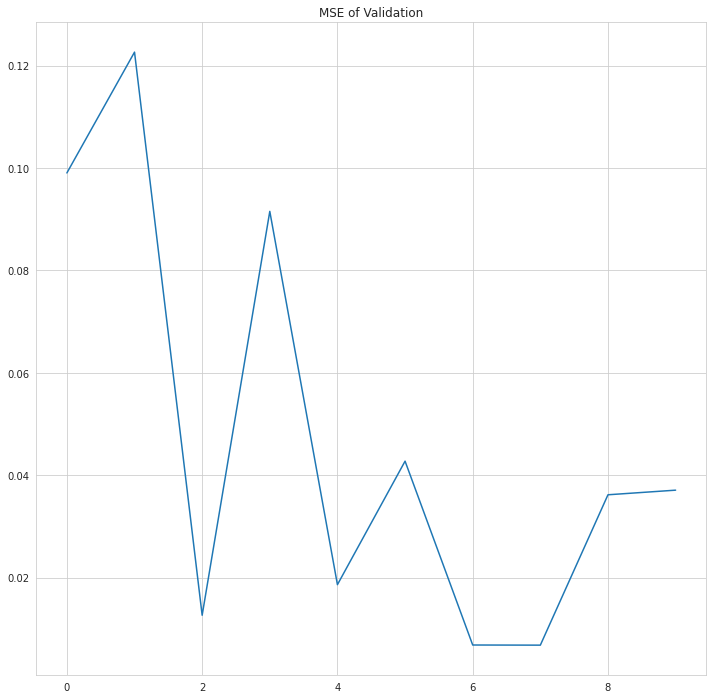

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(error)
plt.title("MSE of Validation",fontsize=12)

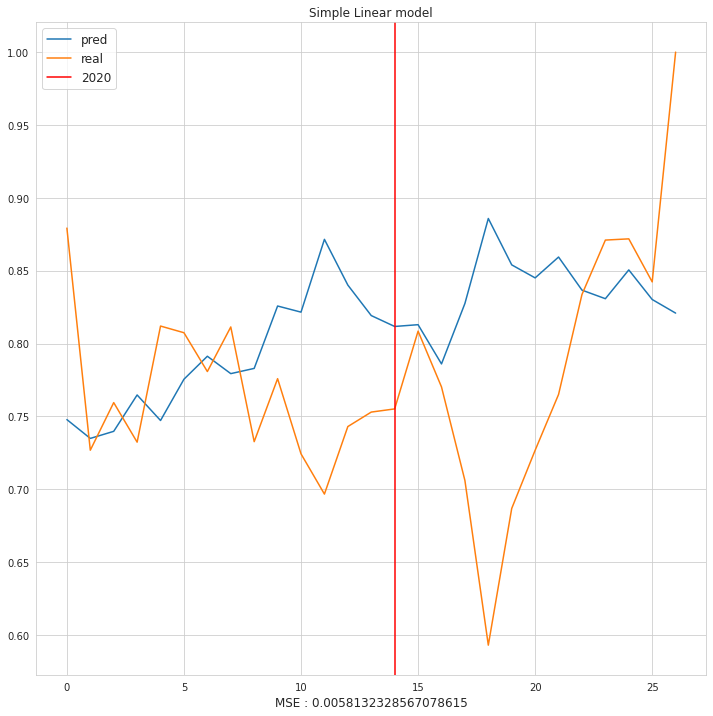

In [ ]:
LR_pred = LR.predict(X_test)

LR_error = mean_squared_error(y_test.tolist()[:-12],LR_pred[:-12])

fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(LR_pred,label="pred")
ax.plot(y_test.tolist(),label="real")
ax.set_title("Simple Linear model",fontsize=12)
ax.set_xlabel("MSE : {}".format(LR_error),fontsize=12)

plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")

plt.legend(fontsize=12)

Text(0.5, 1.0, 'Quantitative Bubble')

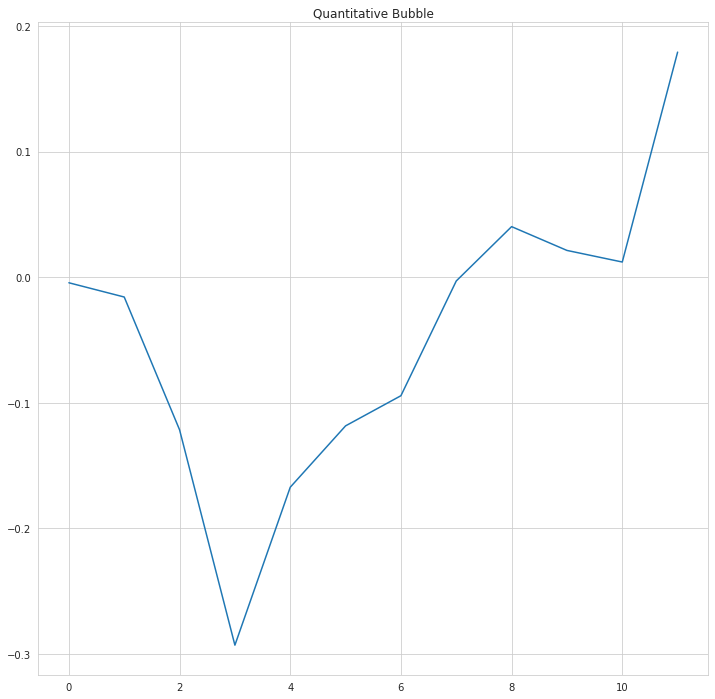

In [ ]:
LR_alpha = y_test.tolist()[-12:]-LR_pred[-12:]

plt.figure(figsize=(12,12))
plt.plot(LR_alpha)
plt.title("Quantitative Bubble")

# LGBM 모델 예측치 평균

In [ ]:
pred_dp_gs = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/lgbm_dp_gs.csv") #dp 제외한 그리드서치 예측값
pred_pl_gs = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/lgbm_pl_gs.csv") #pl 제외한 그리드서치 예측값
pred_raw_gs = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/lgbm_raw_gs.csv") #전체 feature을 포함하는 그리드 서치 예측값
pred_dp = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/pred_dp.csv") #dp 제외한 lgbm 예측값
pred_pl = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/pred_pl.csv") #pl 제외한 lgbm 예측값
pred_raw = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/supervised/pred/pred_raw.csv") #전체 feature을 포함하는 lgbm 예측값

In [ ]:
pred_mean = np.mean(np.hstack([pred_dp_gs,pred_pl_gs,pred_raw_gs,pred_dp,pred_pl,pred_raw]),axis=1) #위 예측값들의 평균

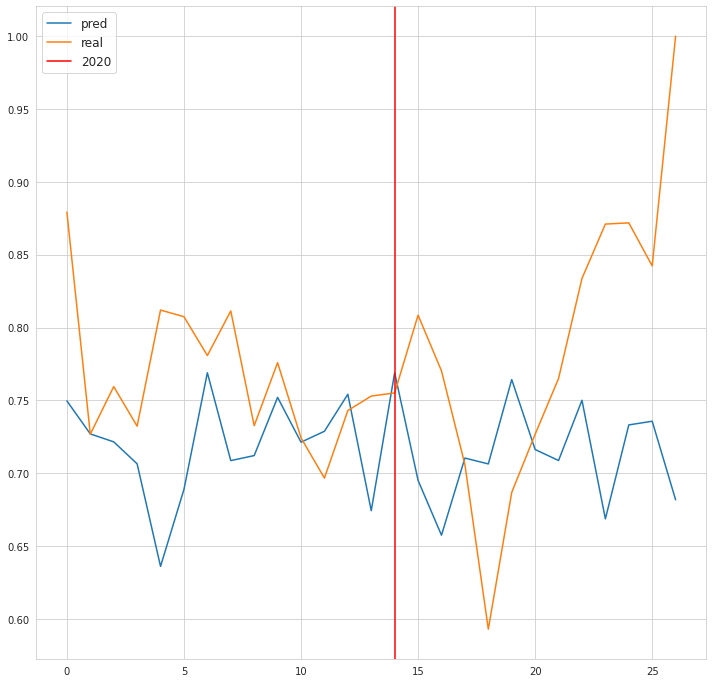

In [ ]:
# 예측 평균값 plotting

fig = plt.figure(figsize=(12,12))

ax = fig.subplots(1,1)

plt.plot(pred_mean,label="pred")

plt.plot(y_test.tolist(),label="real")
plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")

plt.legend(fontsize=12)

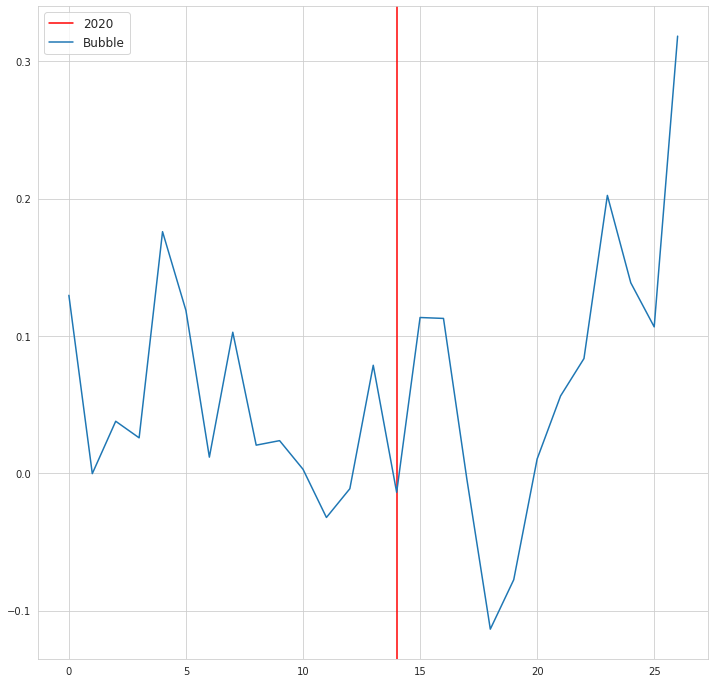

In [ ]:
# 실제값 - 예측값 평균한 데이터

mean_alpha = np.array(y_test) - np.array(pred_mean)

fig = plt.figure(figsize=(12,12))

ax = fig.subplots(1,1)
plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")


ax.plot(mean_alpha,label="Bubble")

plt.legend(fontsize=12)

In [ ]:
diff = mean_alpha / np.array(pred_mean)*100 #데이터 퍼센트화

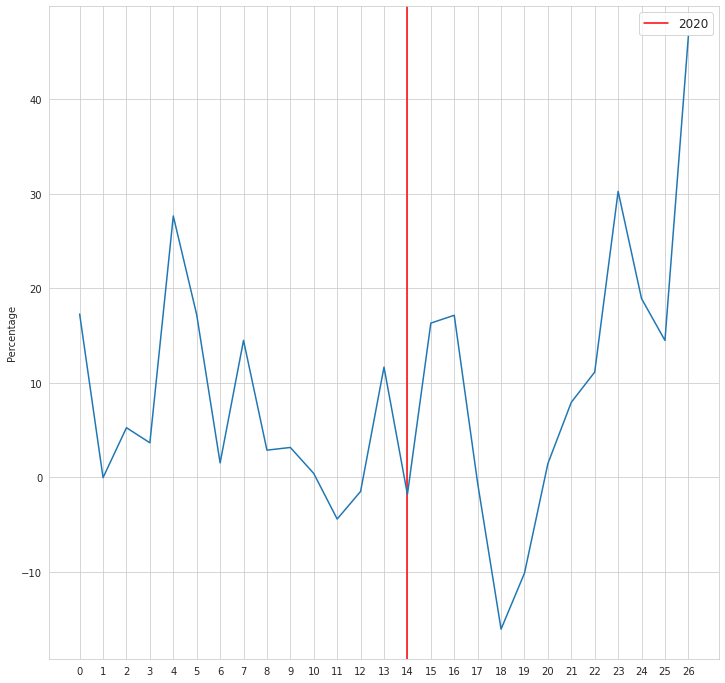

In [ ]:
fig = plt.figure(figsize=(12,12))

ax = fig.subplots(1,1)
plt.axvline(x=14, ymin=0, ymax=1,c="red",label="2020")

plt.plot(diff)
ax.set_ylabel("Percentage")
plt.legend(fontsize=12)
ax.set_xticks(np.arange(0,27))